
# Języki skryptowe - Python
## Wykład 5

---

* *timeit*, czyli pythonowy stoper
* złożoność algorytmów + przykłady
* notacja "dużego &Omicron;" (Omicron)
* algorytmy sortowania

## Dygresja o *__main__*

---

In [1]:
import math

print(__name__)      # nazwa skryptu
print(math.__name__) # nazwa zaimportowanego modułu

__main__
math


In [2]:
# instrukcje z main
# z zaimportowanych modułów
# nie zostaną wywołane

if __name__ == "__main__":
    print("Hello World!")

Hello World!


## *timeit*

---

In [3]:
def silnia(n):
    """Zwraca silnię liczby n."""
    if n < 2:
        return 1 # 0! = 1, 1! = 1
    return n*silnia(n - 1)

In [4]:
from timeit import timeit

# timeit(funkcja, setup, number) -> czas wykonania funkcji w s
# funkcja - funkcja do wykonania
# setup - konfiguracja
# number - liczba powtórzeń
timeit("silnia(10)", setup="from __main__ import silnia", number=10)

3.7365999560279306e-05

In [5]:
timeit("silnia(100)", setup="from __main__ import silnia", number=10)

0.0004746449994854629

## *timeit* z linii komend

---

```py
# silnia.py

def silnia(n):
    """Zwraca silnię liczby n."""
    if n < 2:
        return 1 # 0! = 1, 1! = 1
    return n*silnia(n - 1)
```

* możemy przetestować naszą funkcję z linii komend

```
$ python -m timeit -n10 'from silnia import silnia; silnia(10)'
10 loops, best of 3: 9.11 usec per loop
```

## *timeit* w Jupyter Notebook

---

In [6]:
def silnia(n):
    """Zwraca silnię liczby n."""
    if n < 2:
        return 1 # 0! = 1, 1! = 1
    return n*silnia(n - 1)

In [7]:
%timeit -n10 silnia(10)

10 loops, best of 3: 3.44 µs per loop


**Algorytm** - *ciąg instrukcji prowadzących do rozwiązania zadania*

---

![Algorytm: egzamin](src/algorytm_egzamin.png)

## Koty Ali

---

* Pierwszego dnia Ala dostała jednego kota. Każdego kolejnego dnia dostaje o jednego więcej niż dnia poprzedniego. Ile kotów ma Ala po *n* dniach?
    * pierwszy dzień: 1
    * drugi dzień: 1 + 1
    * trzeci dzień: 1 + 1 + 1
    ...

## Koty Ali - algorytm I

---

In [8]:
def licz_koty_v1(n):
    """Zwraca liczbę kotów po n dniach."""
    n_cats = 0                     # Ala nie ma kota
    for dzien in range(1, n + 1):  # pętla po dniach
        for koty in range(dzien):  # liczba kotów = nr dnia
            n_cats += 1            # dodaj kota
    return n_cats                  # dwie pętle -> n*n operacji

In [9]:
%timeit -n3 licz_koty_v1(10000) # liczba kotów po 10 dniach

3 loops, best of 3: 4.43 s per loop


## Koty Ali - algorytm II

---

In [10]:
def licz_koty_v2(n):
    """Zwraca liczbę kotów po n dniach."""
    n_cats = 0                     # Ala nie ma kota
    for dzien in range(1, n + 1):  # pętla po dniach
        n_cats += dzien            # dodaj koty (= nr dnia)
    return n_cats                  # jedna pętla -> n operacji

In [11]:
%timeit -n3 licz_koty_v2(10000) # liczba kotów po 10 dniach

3 loops, best of 3: 904 µs per loop


## Koty Ali - algorytm III

---

In [12]:
def licz_koty_v3(n):
    """Zwraca liczbę kotów po n dniach."""
    return n * (n + 1) // 2 # jedna operacja

In [13]:
%timeit -n3 licz_koty_v3(10000) # liczba kotów po 10 dniach

3 loops, best of 3: 535 ns per loop


## Koty Ali - algorytm IV

---

In [14]:
def licz_koty_v4(n):
    """Zwraca liczbę kotów po n dniach."""
    koty = list(range(n + 1)) # n zmiennych w pamięci
    return sum(koty)          # jedna pętla -> n operacji

In [15]:
%timeit -n3 licz_koty_v4(10000) # liczba kotów po 10 dniach

3 loops, best of 3: 411 µs per loop


## *range* vs *list(range)*

---

```
$ python -m timeit -n10 'range(1000000)'
10 loops, best of 3: 0.684 usec per loop

$ python -m timeit -n10 'list(range(1000000))'
10 loops, best of 3: 52.3 msec per loop
```

## Koty Ali - algorytm V

---

In [16]:
def licz_koty_v5(n):
    """Zwraca liczbę kotów po n dniach."""
    return sum(range(n + 1)) # jedna pętla -> n operacji

In [17]:
%timeit -n3 licz_koty_v5(10000) # liczba kotów po 10 dniach

3 loops, best of 3: 471 µs per loop


## Złożoność algorytmu

---

* złożoność czasowa -> liczba operacji
* złożoność pamięciowa -> ilość potrzebnej pamięci

|          | Alg I | Alg II     | Alg III | Alg IV     | Alg V      |
|:--------:|:-----:|:----------:|:-------:|:----------:|:----------:|
| operacje | $n^2$ | $n$        | $1$     | $n$        | n          |
| pamięć   | $1$   | $1$        | $1$     | $n$        | 1          |
| czas     | 4.6 s | 973 $\mu$s | 768 ns  | 661 $\mu$s | 475 $\mu$s |

## Wartość wielomianu

---

* Dany jest wielomian:

$$ W(x) = a_0 + a_1\cdot x + a_2 \cdot x^2 + ... + a_n \cdot x^n$$

* Korzystając bezpośrednio z powyższgo wzoru należy wykonać $n$ dodawań oraz $1 + 2 + ... + n  = \frac{n\cdot(n+1)}{2}$ mnożeń

## Metoda naiwna

---

In [18]:
def naive(a, x):
    """Zwraca wartość wielomianu o współczynnikach a w punkcie x."""
    result = 0
    for i, ai in enumerate(a): # i - indeks, ai - współczynnik a_i
        result += ai * x**i    # W(x) += a_i * x^i
    return result

In [19]:
a = range(500)
x = 3.5

naive(a, x)

2.1569220024001972e+274

In [20]:
%timeit -n3 naive(a, x)

3 loops, best of 3: 259 µs per loop


## Schemat Hornera

---

* Zapisując wielomian w postaci:

$$W(x) = a_0 + x\cdot(a_1 + x\cdot(a_2 + ... + x\cdot(a_{n-1} + a_n\cdot x)...)$$

* organiczamy się do $n$ dodań i $n$ mnożeń

## Algorytm Hornera

---

$$W(x) = a_0 + x\cdot(a_1 + x\cdot(a_2 + ... + x\cdot(a_{n-1} + a_n\cdot x)...)$$

* Niech

$$b_n = a_n$$
$$b_{n-1} = b_n\cdot x + a_{n-1}$$
$$b_{n-2} = n_{n-1}\cdot x + a_{n-2}$$
$$...$$
$$b_1 = b_2\cdot x + a_1$$
$$b_0 = b_1\cdot x + a_0$$

* $b_0$ - wartość wielomianu

## Horner vs Naive

---

In [21]:
def horner(a, x):
    """Zwraca wartość wielomianu o współczynnikach a w punkcie x."""
    result = 0
    for w in a[-1::-1]:         # "reverse"
        result = result * x + w # b_i = b_{i-1} * x + a_i
    return result

In [22]:
a = range(500)
x = 3.5

horner(a, x)

2.156922002400198e+274

In [23]:
%timeit -n3 horner(a, x)

3 loops, best of 3: 98.1 µs per loop


In [24]:
%timeit -n3 naive(a, x)

3 loops, best of 3: 257 µs per loop


## Złożoność algorytmów

---

* czas w zależności od rozmiaru danych (N)
* zajęta pamięć (pomijając dane wejściowe)
* najczęściej interesuje nas złożoność asymptotyczna (dla dużych N)
* np. które człony $$f(n) = n^3 +10\cdot n^2 + 100\cdot n + 1000\cdot\ln(n)$$ są znaczące?

## Wkłady od różnych członów

---

In [25]:
def terms(f):
    """Zwraca kolejne człony funkcji f (oddzielone +)."""    
    return [term.strip() for term in f.split('+')]

In [26]:
terms("n**2 + 10*n")

['n**2', '10*n']

In [27]:
def eval_f(f, n = 1):
    """Zwraca wartość funkcji f w punkcie n."""
    return eval(f)

In [28]:
eval_f("n**2 + 10*n", n = 5)

75

## Wkłady od różnych członów

---

In [29]:
def eval_terms(*terms, n = 1):
    """Zwraca wartości kolejnych członów w punkcie n."""
    return [eval_f(term, n) for term in terms]

In [30]:
eval_f("n**2", n = 5), eval_f("10*n", n = 5)

(25, 50)

In [31]:
eval_terms(*terms("n**2 + 10*n"), n = 5)

[25, 50]

## Wkłady od różnych członów

---

In [32]:
def print_cell(cell, width=10):
    """Drukuje pojedynczą komórkę w tabeli."""
    print(str(cell).rjust(width), end=' |')

def table_head(f, width=10):
    """Drukuje pierwsze rząd tabeli."""
    print_cell("n", width)
    for term in terms(f):
        print_cell(term, width)
    print("\n" + "-" * width * (len(terms(f)) + 2))

In [33]:
table_head("n**2 + 10*n")

         n |      n**2 |      10*n |
----------------------------------------


## Wkłady od różnych członów

---

In [34]:
def f_as_table(f, *args, width=10):
    """Drukuje tabelę z procentowym wkładem każdego członu."""
    table_head(f, width)
    for n in args:
        print_cell(n, width)
        f_val = eval_f(f, n)
        for term in eval_terms(*terms(f), n = n):
            print_cell(round(term / f_val * 100), width)
        print()

In [35]:
f_as_table("n**2 + 10*n", 1, 10, 100, width=5)

    n | n**2 | 10*n |
--------------------
    1 |    9 |   91 |
   10 |   50 |   50 |
  100 |   91 |    9 |


## Wkłady od różnych członów

---

$$f(n) = n^3 +10\cdot n^2 + 100\cdot n + 1000\cdot\ln(n)$$

In [36]:
from math import log

n = [10**i for i in range(5)]
f_as_table("n**3 + 10*n**2 + 100*n + 1000*log(n)", *n, width=12)

           n |        n**3 |     10*n**2 |       100*n | 1000*log(n) |
------------------------------------------------------------------------
           1 |           1 |           9 |          90 |           0 |
          10 |          19 |          19 |          19 |          43 |
         100 |          90 |           9 |           1 |           0 |
        1000 |          99 |           1 |           0 |           0 |
       10000 |         100 |           0 |           0 |           0 |


## Notacja dużego &Omicron;

---

* Funkcja $f(n)$ jest $O(g(n))$, jeśli istnieją liczby dodatnie $c$ i $n_0$, takie że:

$$\forall_{n>n_0} ~~~~~ f(n) < c\cdot g(n)$$

* Jeśli $f_1(n) \in O(g(n))$ i $f_2(n) \in O(g(n))$, to:

$$f_1(n) + f_2(n) \in O(g(n))$$
$$f_1(n) \cdot f_2(n) \in O(g^2(n))$$

## Notacja dużego &Omicron; - przykład

---

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

n = np.arange(1, 50, 1) # kolejne liczby naturalne
f = [n**3 + 10*n**2 + 100*n + 1000*log(n) for n in n] # wartości f(n)
g = [2*n**3 for n in n] # wartości g(n)

f_plot, = plt.plot(n, f, 'rs', label="$f(n) = n^3 + 10\cdot n^2 + 100\cdot n + 1000\cdot\ln(n)$")
g_plot, = plt.plot(n, g, 'bo', label="$g(n) = 2\cdot n^3$")

legend = plt.legend(handles=[f_plot, g_plot], loc=2)

line = plt.plot((22, 22), (0, 150000), 'k--')

label = plt.text(52, 75000, "$\\forall_{n\geq 22}$   $g(n) > f(n)$ \n\n"
                            "$f(n) \in O(n^3)$", fontsize=20)

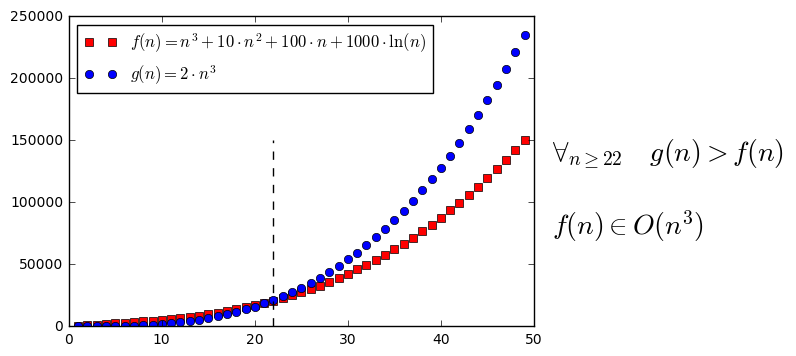

In [38]:
plt.show()

## Przykłady rzędów złożoności - $O(1)$

---

* Proste operacje: arytmetyczne, logiczne, porównania, przypisania, dostęp do struktury danych

In [39]:
def constant(n):
    return n*n # jedna operacja -> O(1)

## Przykłady rzędów złożoności - $O(n)$

---

In [40]:
def linear(n):
    result = 0 # 1 * operacja
    for element in n:     # n * operacja
        result += element # n * operacja
        result *= 0.1     # n * operacja
    return suma

* ostatecznie mamy $3n + 1$ operacji, więc złożoność asymptotyczna -> $O(n)$

## Przykłady rzędów złożoności - $O(n)$

---

In [41]:
def linear(n):
    for element in n:
        if element == 0:
            return True
    return False

* złożoność asymptotyczna -> $O(n)$
* może być lepsza (nawet $O(1)$), ale w najgorszym wypadku będzie *n* operacji

## Przykłady rzędów złożoności - $O(n + m)$

---

In [42]:
def linear(n, m):
    result = 0
    
    for element in n:
        result += element
    
    for element in n:
        result += element
        
    return result

* dwie pętle: $O(n)$ i $O(m)$
* złożoność asymptotyczna $O(n+m)$

## Przykłady rzędów złożoności - $O(n^2)$

---

In [43]:
def quadratic(n):
    result = 0
    for i in range(n):
        for j in range(i, n):
            result += 1
    return result

* pętla zewnętrzna -> $n$ razy
* pętla wewnętrzna -> $(n-i)$ razy
* w sumie $1 + 2 + ... + n = \frac{n\cdot(n + 1)}{2} = \frac{1}{2}n^2 + \frac{1}{2}n$
* złożoność asymptotyczna: $O(n^2) + O(n) = O(n^2)$

## Przykłady rzędów złożności - $O(\log n)$

---

In [44]:
def logarithmic(n):
    result = 0
    while n > 1:
        n //= 2
        result += 1
    return result

* w każdej iteracji zmniejszamy $n$ dwukrotnie
* jeśli $n = 2^x$, to wykonamy $\log n$ operacji
* algorytm jest $O(\log n)$

## Porównanie złożoności

---

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

n = np.arange(1, 100, 1)  # kolejne liczby naturalne
f = [n for n in n]        # zależność liniowa
g = [n**2 for n in n]     # zależność kwadratowa
h = [log(n) for n in n]   # zależność logarytmiczna
i = [n*log(n) for n in n] # zależność liniowo-logarytmiczna

g_plot, = plt.plot(n, g, 'b.', label="$n^2$")
i_plot, = plt.plot(n, i, 'k.', label="$n\log n$")
f_plot, = plt.plot(n, f, 'r.', label="$n$")
h_plot, = plt.plot(n, h, 'g.', label="$\log n$")

plt.yscale("log")

legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

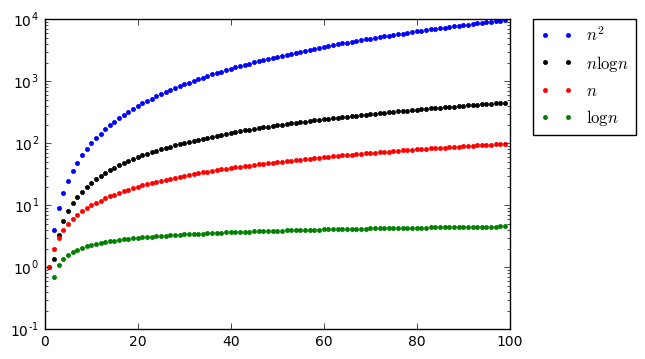

In [46]:
plt.show()

In [47]:
# na wszelki wypadek do testów sortowania dużych tablic
import sys
sys.setrecursionlimit(10000)

## Sortowanie bąbelkowe (*bubble sort*)

---

1. porównuj cyklicznie dwa sąsiadujące elementy
2. zmień kolejność jeśli zaburzają porządek
3. przerwij, jeśli nie ma co zmieniać

## Sortowanie bąbelkowe - przykład

---

[<b style='color:red'>3</b>, <b style='color:red'>6</b>, 4, 2] --> [3, <b style='color:blue'>6</b>, <b style='color:blue'>4</b>, 2] --> [3, 4, <b style='color:blue'>6</b>, <b style='color:blue'>2</b>] --> [3, 4, 2, 6]

[<b style='color:red'>3</b>, <b style='color:red'>4</b>, 2, 6] --> [3, <b style='color:blue'>4</b>, <b style='color:blue'>2</b>, 6] --> [3, 2, <b style='color:red'>4</b>, <b style='color:red'>6</b>] --> [3, 2, 4, 6]

[<b style='color:blue'>3</b>, <b style='color:blue'>2</b>, 4, 6] --> [2, <b style='color:red'>3</b>, <b style='color:red'>4</b>, 6] --> [2, 3, <b style='color:red'>4</b>, <b style='color:red'>6</b>] --> [2, 3, 4, 6]

[<b style='color:red'>2</b>, <b style='color:red'>3</b>, 4, 6] --> [2, <b style='color:red'>3</b>, <b style='color:red'>4</b>, 6] --> [2, 3, <b style='color:red'>4</b>, <b style='color:red'>6</b>] --> [2, 3, 4, 6]

*(brak zmian -> koniec)*

## Implementacja

---

In [48]:
def bubblesort(lst):
    """Sortuje podaną listę."""
    n = len(lst) # liczba elementów
    while True:  # powtarzaj do break
        swapped = False # ustaw flagę na fałsz
        for i in range(n-1): # pętla od 0 do n-2
            if lst[i] > lst[i+1]: # porządek zaburzony
                lst[i], lst[i+1] = lst[i+1], lst[i] # podmień
                swapped = True # ustaw flagę na prawdę
        if not swapped: # przerwij jeśli nie było zmian
            break

In [49]:
x = [3, 6, 4, 2]

bubblesort(x)
     
print(x)

[2, 3, 4, 6]


## Krok po kroku

---

In [50]:
def bubblesort_v1(lst):
    """Sortuje podaną listę."""
    n = len(lst) # liczba elementów
    while True:  # powtarzaj do break
        swapped = False # ustaw flagę na fałsz
        print(lst, end=' ')
        for i in range(n-1): # pętla od 0 do n-2
            if lst[i] > lst[i+1]: # porządek zaburzony
                lst[i], lst[i+1] = lst[i+1], lst[i] # podmień
                swapped = True # ustaw flagę na prawdę
            print("->", lst, end=' ')
        print()
        if not swapped: # przerwij jeśli nie było zmian
            break

In [51]:
bubblesort_v1([3, 6, 4, 2])

[3, 6, 4, 2] -> [3, 6, 4, 2] -> [3, 4, 6, 2] -> [3, 4, 2, 6] 
[3, 4, 2, 6] -> [3, 4, 2, 6] -> [3, 2, 4, 6] -> [3, 2, 4, 6] 
[3, 2, 4, 6] -> [2, 3, 4, 6] -> [2, 3, 4, 6] -> [2, 3, 4, 6] 
[2, 3, 4, 6] -> [2, 3, 4, 6] -> [2, 3, 4, 6] -> [2, 3, 4, 6] 


## Optymalizacja I

---

In [52]:
def bubblesort_v2(lst):
    """Sortuje podaną listę."""
    n = len(lst) # liczba elementów
    while True:  # powtarzaj do break
        swapped = False # ustaw flagę na fałsz
        print(lst, end=' ')
        for i in range(n-1): # pętla od 0 do n-2
            if lst[i] > lst[i+1]: # porządek zaburzony
                lst[i], lst[i+1] = lst[i+1], lst[i] # podmień
                swapped = True # ustaw flagę na prawdę
            print("->", lst, end=' ')
        print()
        if not swapped: # przerwij jeśli nie było zmian
            break
        n -= 1 # n-te przejście -> n-ty największy na miejscu

In [53]:
bubblesort_v2([3, 6, 4, 2])

[3, 6, 4, 2] -> [3, 6, 4, 2] -> [3, 4, 6, 2] -> [3, 4, 2, 6] 
[3, 4, 2, 6] -> [3, 4, 2, 6] -> [3, 2, 4, 6] 
[3, 2, 4, 6] -> [2, 3, 4, 6] 
[2, 3, 4, 6] 


## Optymalizacja II

---

In [54]:
def bubblesort_v3(lst):
    """Sortuje podaną listę."""
    n = len(lst) # liczba elementów
    while n > 0:
        new_n = 0 # miejsce ostatniej zmiany
        print(lst, end=' ')
        for i in range(n-1): # pętla od 0 do n-2
            if lst[i] > lst[i+1]: # porządek zaburzony
                lst[i], lst[i+1] = lst[i+1], lst[i] # podmień
                new_n = i + 1 # indeks ostatniej zmiany
            print("->", lst, end=' ')
        print("new_n =", new_n)
        n = new_n # ostatnie przejście -> reszta musi być na miejscu

In [55]:
bubblesort_v3([3, 6, 4, 2])

[3, 6, 4, 2] -> [3, 6, 4, 2] -> [3, 4, 6, 2] -> [3, 4, 2, 6] new_n = 3
[3, 4, 2, 6] -> [3, 4, 2, 6] -> [3, 2, 4, 6] new_n = 2
[3, 2, 4, 6] -> [2, 3, 4, 6] new_n = 1
[2, 3, 4, 6] new_n = 0


## Złożoność *bubblesort*

---

* $n$ operacji -> co najmniej ostatni na swoim miejscu
* $(n-1)$ operacji -> dwa ostatnie na swoim miejscu
* $(n-2)$ operacji -> trzy na swoim miejscu itd...
* $n + (n-1) + (n-2) + ... = O(n^2)$

## Sortowanie przez scalanie (*mergesort*)

---

* podziel nieposortowaną listę na $n$ "podlist" zawierających po jednym elemencie
* cyklicznie *scalaj* "podlisty" w posortowane "podlisty", aż zostanie jedna

Start: [3, 6, 4, 2]

Split: [3] [6] [4] [2]

Merge: [3, 6] [2, 4]

Merge: [2, 3, 4, 6]

## Algorytm scalania

---

* mając dwie uporządkowane listy
* porównaj skrajne elementy i mniejszy zapisz w liście wyjściowej
* powtarzaj dopóki jedna z list się nie skończy
* resztę dopisz na koniec wyjściowej listy

## Algorytm scalania - przykład

---

[<b style='color:blue'>1</b>, 6, 7] + [<b style='color:red'>2</b>, 3, 4, 5, 8, 9] --> [1]

[<b style='color:red'>6</b>, 7] + [<b style='color:blue'>2</b>, 4, 5, 8, 9] --> [1, 2]

[<b style='color:red'>6</b>, 7] + [<b style='color:blue'>3</b>, 4, 5, 8, 9] --> [1, 2, 3]

[<b style='color:red'>6</b>, 7] + [<b style='color:blue'>4</b>, 5, 8, 9] --> [1, 2, 3, 4]

[<b style='color:red'>6</b>, 7] + [<b style='color:blue'>5</b>, 8, 9] --> [1, 2, 3, 4, 5]

[<b style='color:red'>6</b>, 7] + [<b style='color:blue'>8</b>, 9] --> [1, 2, 3, 4, 5, 6]

[<b style='color:blue'>7</b>] + [<b style='color:red'>8</b>, 9] --> [1, 2, 3, 4, 5, 6, 7]

[] + [8, 9] --> [1, 2, 3, 4, 5, 6, 7, 8, 9]

## Algorytm scalania - implementacja

---

In [56]:
def merge(A, B):
    """Scala posortowane listy zachowując porządek elementów."""
    result = [] # scalona lista
    while len(A) and len(B): # dopoki obie mają elementy
        # dodaj mniejszy element (usuwając go jednocześnie z listy)
        if A[0] < B[0]:
            result.append(A.pop(0))
        else:
            result.append(B.pop(0))
    
    result.extend(A) # dodaj resztę 
    result.extend(B) # (jeśli została)
        
    return result

In [57]:
merge([1, 6, 7], [2, 3, 4, 5, 8, 9])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## Sortowanie przez scalanie - przykład

---

Start: [1, 4, 2, 5, 6, 3, 9, 7, 8]

Split: [1] [4] [2] [5] [6] [3] [9] [7] [8]

Merge: [1, 4] [2, 5] [3, 6] [7, 9] [8]

Merge: [1, 2, 4, 5] [3, 6, 7, 9] [8]

Merge: [1, 2, 3, 4, 5, 6, 7, 9] [8]

Merge: [1, 2, 3, 4, 5, 6, 7, 8, 9]

## Sortowanie przez scalanie - implementacja

---

In [58]:
def mergesort(lst):
    """Sortuje podaną listę."""
    if len(lst) < 2: # lista jednoelementowa
        return lst   # nie wymaga sortowania
    
    middle = len(lst) // 2 # środek listy
    
    left = mergesort(lst[:middle])  # dziel na dwie części
    right = mergesort(lst[middle:]) # i wywołaj merge_sort (rekurencja)
    
    return merge(left, right) # scal dwie listy

In [59]:
mergesort([1, 4, 2, 5, 6, 3, 9, 7, 8])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## Krok po kroku

---

In [60]:
def mergesort_p(lst):
    """Sortuje podaną listę."""
    if len(lst) < 2: # lista jednoelementowa
        return lst   # nie wymaga sortowania
    
    middle = len(lst) // 2 # środek listy
    
    left = mergesort_p(lst[:middle])  # dziel na dwie części
    right = mergesort_p(lst[middle:]) # i wywołaj merge_sort (rekurencja)
    
    # drukuj obecny stan
    # użyj kopii, żeby nie modyfikowac tablic
    print("left =", left, "\tright =", right,
          "\t-->", merge(left.copy(), right.copy()))
    
    return merge(left, right) # scal dwie listy

## Krok po kroku

---

In [61]:
mergesort_p([1, 4, 2, 5, 6, 3, 9, 7, 8])

left = [1] 	right = [4] 	--> [1, 4]
left = [2] 	right = [5] 	--> [2, 5]
left = [1, 4] 	right = [2, 5] 	--> [1, 2, 4, 5]
left = [6] 	right = [3] 	--> [3, 6]
left = [7] 	right = [8] 	--> [7, 8]
left = [9] 	right = [7, 8] 	--> [7, 8, 9]
left = [3, 6] 	right = [7, 8, 9] 	--> [3, 6, 7, 8, 9]
left = [1, 2, 4, 5] 	right = [3, 6, 7, 8, 9] 	--> [1, 2, 3, 4, 5, 6, 7, 8, 9]


[1, 2, 3, 4, 5, 6, 7, 8, 9]

## Złożoność *mergesort*

---

* $\log_2 n + 1$ *poziomów*
* na każdym $n$ operacji
* złożoność czasowa -> $O(n\cdot\log n)$
* złożoność pamięciowa -> $O(n)$

## Sortowanie szybkie (*quicksort*)

---

* wybierz element rozdzielający (*pivot*)
* elementy nie większe przenieś "na lewo", resztę "na prawo"
* powtórz rekurencyjnie dla części "lewej" i "prawej"

## Sortowanie szybkie - przykład

---

[1, 4, 2, 5, **6**, 3, 9, 7, 8] -> [<font style='color:blue'>1, 4, 2, 5, 3</font>, **6**, <font style='color:green'>9, 7, 8</font>]

<font style='color:blue'>[1, 4, **2**, 5, 3]</font> -> [1, **2**, <font style='color:red'>4, 5, 3</font>]

<font style='color:red'>[4, **5**, 3]</font> -> [<font style='color:purple'>4, 3</font>, **5**]

<font style='color:purple'>[4, **3**]</font> -> [**3**, 4]

<font style='color:green'>[9, **7**, 8]</font> -> [**7**, <font style='color:orange'>9, 8</font>]

<font style='color:orange'>[**9**, 8]</font> -> [8, **9**]


## Sortowanie szybkie - *pivot*

---

* kluczowy jest wybór elementu rozdzielającego 
* przeciętnie, złożoność algorytmu $O(n\cdot\log n)$, gdy dzielimy dane na mniej więcej dwa równe podzbiory
* gdy *pivot* jest wartością skrajną, to mamy jeden podzbiór $1$-elementowy i drugi $(n-1)$-elementowy; wtedy złożoność algorytmu $O(n^2)$

## *pivot* - wybór

---

* stały element: brzeg lub środek -> kiepski wybór
* losowy -> teoretycznie kiepski, ale w praktyce się sprawdza
* mediana -> dobry wybór, ale kosztowny
* *mediana z trzech* -> mediana z pierwszego, ostatniego i środkowego

## Implementacja *quicksort*

---

In [62]:
# "jednolinijkowy if"- niezalecany (na potrzeby slajdu)
def quicksort(lst):
    """Sortuje podaną listę."""
    if not len(lst): return lst # nie ma co sortować
    
    left, middle, right = [], [], [] # mniejsze, równe, większe
    
    pivot = lst[0] # kiepski wybór
    
    for x in lst:
        if x < pivot: left.append(x)
        elif x > pivot: right.append(x)
        else: middle.append(x)
            
    # wywołaj rekurencyjnie dla "lewej" i "prawej" części
    return quicksort(left) + middle + quicksort(right)

In [63]:
quicksort([1, 4, 2, 5, 6, 3, 9, 7, 8])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## *mergesort* vs *quicksort*

---

In [64]:
import random

# 1000 losowych liczb od 0 do 999
x = random.sample(range(10000), 10000) 
y = x.copy()

In [65]:
%timeit -n3 quicksort(x)

3 loops, best of 3: 44.7 ms per loop


In [66]:
%timeit -n3 mergesort(y)

3 loops, best of 3: 114 ms per loop


In [67]:
%timeit -n3 quicksort(list(range(1000)))

3 loops, best of 3: 97.1 ms per loop


In [68]:
%timeit -n3 mergesort(list(range(1000)))

3 loops, best of 3: 5.73 ms per loop


## *bubblesort* vs *mergesort* vs *quicksort*

---

In [69]:
def bubblesort(lst):
    """Sortuje podaną listę."""
    n = len(lst) # liczba elementów
    while n > 0:
        new_n = 0 # miejsce ostatniej zmiany
        for i in range(n-1): # pętla od 0 do n-2
            if lst[i] > lst[i+1]: # porządek zaburzony
                lst[i], lst[i+1] = lst[i+1], lst[i] # podmień
                new_n = i + 1 # indeks ostatniej zmiany
        n = new_n # ostatnie przejście -> reszta musi być na miejscu
        
def merge(A, B):
    """Scala posortowane listy zachowując porządek elementów."""
    result = [] # scalona lista
    while len(A) and len(B): # dopoki obie mają elementy
        # dodaj mniejszy element (usuwając go jednocześnie z listy)
        if A[0] < B[0]:
            result.append(A.pop(0))
        else:
            result.append(B.pop(0))
    
    result.extend(A) # dodaj resztę 
    result.extend(B) # (jeśli została)
        
    return result

def mergesort(lst):
    """Sortuje podaną listę."""
    if len(lst) < 2: # lista jednoelementowa
        return lst   # nie wymaga sortowania
    
    middle = len(lst) // 2 # środek listy
    
    left = mergesort(lst[:middle])  # dziel na dwie części
    right = mergesort(lst[middle:]) # i wywołaj merge_sort (rekurencja)
    
    return merge(left, right) # scal dwie listy

def quicksort(lst):
    """Sortuje podaną listę."""
    if not len(lst): # nie ma co sortować
        return lst
    
    left = []   # elementy mniejsze
    middle = [] # elementy równe
    right = []  # elementy większe
    
    pivot = lst[0] # kiepski wybór
    
    for x in lst:
        if x < pivot: left.append(x)
        elif x > pivot: right.append(x)
        else: middle.append(x)
            
    # wywołaj rekurencyjnie dla "lewej" i "prawej" części
    return quicksort(left) + middle + quicksort(right)

In [70]:
from timeit import timeit
import random

sizes = [10, 50, 100, 500, 1000, 5000, 10000]
bsort, msort, qsort = [], [], [] # wyniki timeit
         
for size in sizes:
    x = random.sample(range(size), size)
    y = x.copy()
    z = x.copy()
    
    bs = timeit("bubblesort(x)", number=1,
                setup="from __main__ import bubblesort, x")

    ms = timeit("mergesort(y)", number=1,
                setup="from __main__ import mergesort, y")

    qs = timeit("quicksort(z)", number=1,
                setup="from __main__ import quicksort, z")

    bsort.append(bs)
    msort.append(ms)
    qsort.append(qs)

## *bubblesort* vs *mergesort* vs *quicksort*

---

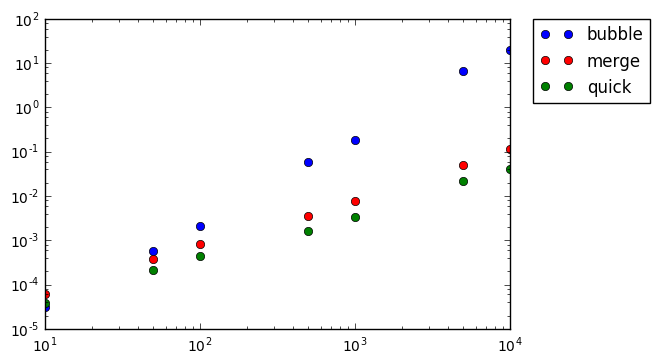

In [82]:
import matplotlib.pyplot as plt

bs = plt.plot(sizes, bsort, 'bo', label="bubble")
ms = plt.plot(sizes, msort, 'ro', label="merge")
qs = plt.plot(sizes, qsort, 'go', label="quick")

plt.xscale("log")
plt.yscale("log")

legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [1]:
# css prezentacji


from IPython.display import display, HTML

s = """

<style>

.rendered_html code {
  font-size: 75%;
}

</style>

"""

display(HTML(s))